<a href="https://colab.research.google.com/github/descartesmbogning/Marburg-virus-research/blob/main/2_countries_groupby_worlbank_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import seaborn as sns
import missingno as msno
%matplotlib inline

import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

## import data

In [ ]:
data = pd.read_pickle('D:\MARBURG VIRUS DISEASES\DATA_PREPROCESSING/countries_split.pkl')#.drop(['Addresses'], axis=1)

data2 = data.reset_index().rename(columns={"UT (Unique WOS ID)": "wos_ID"})
data2['wos_ID'] = data2['wos_ID'].str.lower()
data2

,wos_ID,Addresses,Afghanistan,United States,Angola,Argentina,Australia,Austria,Bangladesh,Belgium,...,Thailand,Turkey,United Arab Emirates,Uganda,Ukraine,Venezuela,Vietnam,Zambia,Zimbabwe,Sudan
0,wos:000904661800001,"[Bi, Jinhao; Xia, Xianzhu] Jilin Agr Univ, Col...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wos:000921279800001,"[Ye, Xin; Holland, Richard; Wood, Mark; Pasetk...",NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wos:000909001200001,"[Moskalik, Mikhail Yu.] Russian Acad Sci, Irku...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wos:000777045900001,"[Abir, Mehedy Hasan] Chattogram Vet & Anim Sci...",NaN,1.0,NaN,NaN,2.0,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wos:000849602200001,"[Sah, Ranjit] Tribhuvan Univ Teaching Hosp, In...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,wos:a1968b358900049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,wos:a1968a855300001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929,wos:a1968a855300006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
930,wos:a1968a855300008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# data_prep = pd.read_excel(f'D:\MARBURG VIRUS DISEASES/data/WOSCC/woscc_bon_23_02_verif_on_wos.xls')[['UT (Unique WOS ID)','Pubmed Id','DOI', 'Source Title','Document Type','Language','Funding Orgs', 'Funding Name Preferred','Open Access Designations','Cited Reference Count',
#        'Times Cited, WoS Core', 'Times Cited, All Databases','180 Day Usage Count', 'Since 2013 Usage Count','WoS Categories', 'Web of Science Index',
#        'Research Areas','Publication Date','Publication Year']]
# data_prep = data_prep.rename(columns={"UT (Unique WOS ID)": "wos_ID"})
# data_prep = data_prep.applymap(lambda s:s.lower() if type(s) == str else s)
# #data_prep = data_prep.drop_duplicates('wos_ID')
# data_prep

In [ ]:
data_prep = pd.read_excel(f'D:\MARBURG VIRUS DISEASES/data/WOSCC/woscc_bon_23_02_verif_on_wos.xls')[['UT (Unique WOS ID)','Funding Orgs', 'Open Access Designations',
       'Times Cited, All Databases','180 Day Usage Count', 'Since 2013 Usage Count','Publication Year']]
data_prep = data_prep.rename(columns={"UT (Unique WOS ID)": "wos_ID"})
data_prep = data_prep.applymap(lambda s:s.lower() if type(s) == str else s)
#data_prep = data_prep.drop_duplicates('wos_ID')
data_prep

,wos_ID,Funding Orgs,Open Access Designations,"Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publication Year
0,wos:000904661800001,NaN,"green accepted, gold",0,14,14,2023.0
1,wos:000921279800001,national institutes of health (nih) [u19ai1427...,hybrid,0,0,0,2023.0
2,wos:000909001200001,russian science foundation; [22-13-00036],"gold, green accepted",0,3,3,2023.0
3,wos:000777045900001,national research foundation of korea (nrf) - ...,"green accepted, gold",10,12,28,2022.0
4,wos:000849602200001,NaN,gold,2,14,14,2022.0
...,...,...,...,...,...,...,...
927,wos:a1968b358900049,NaN,NaN,17,0,2,1968.0
928,wos:a1968a855300001,NaN,NaN,63,0,3,1968.0
929,wos:a1968a855300006,NaN,NaN,42,0,1,1968.0
930,wos:a1968a855300008,NaN,NaN,21,1,1,1968.0


In [ ]:
data_prep.columns

Index(['wos_ID', 'Funding Orgs', 'Open Access Designations',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publication Year'],
      dtype='object')

In [ ]:
data_concat = data2.merge(data_prep, on = 'wos_ID', how='left')
data_concat

,wos_ID,Addresses,Afghanistan,United States,Angola,Argentina,Australia,Austria,Bangladesh,Belgium,...,Vietnam,Zambia,Zimbabwe,Sudan,Funding Orgs,Open Access Designations,"Times Cited, All Databases",180 Day Usage Count,Since 2013 Usage Count,Publication Year
0,wos:000904661800001,"[Bi, Jinhao; Xia, Xianzhu] Jilin Agr Univ, Col...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"green accepted, gold",0,14,14,2023.0
1,wos:000921279800001,"[Ye, Xin; Holland, Richard; Wood, Mark; Pasetk...",NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,national institutes of health (nih) [u19ai1427...,hybrid,0,0,0,2023.0
2,wos:000909001200001,"[Moskalik, Mikhail Yu.] Russian Acad Sci, Irku...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,russian science foundation; [22-13-00036],"gold, green accepted",0,3,3,2023.0
3,wos:000777045900001,"[Abir, Mehedy Hasan] Chattogram Vet & Anim Sci...",NaN,1.0,NaN,NaN,2.0,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,national research foundation of korea (nrf) - ...,"green accepted, gold",10,12,28,2022.0
4,wos:000849602200001,"[Sah, Ranjit] Tribhuvan Univ Teaching Hosp, In...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,gold,2,14,14,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,wos:a1968b358900049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17,0,2,1968.0
928,wos:a1968a855300001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63,0,3,1968.0
929,wos:a1968a855300006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,42,0,1,1968.0
930,wos:a1968a855300008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21,1,1,1968.0


### years

In [ ]:
data_concat['Publication Year'].value_counts()

2018.0    63
2015.0    61
2021.0    56
2017.0    55
2022.0    53
2020.0    53
2019.0    50
2011.0    47
2016.0    46
2012.0    44
2014.0    43
2007.0    35
2010.0    33
2009.0    30
2013.0    25
2006.0    22
2005.0    19
2008.0    17
2004.0    16
2001.0    15
2000.0    13
1996.0    12
2003.0    11
2002.0    11
1968.0    10
1982.0     8
1993.0     8
1999.0     8
1998.0     8
1995.0     6
1992.0     5
1969.0     4
1978.0     4
1994.0     4
1980.0     4
1979.0     4
1997.0     4
1977.0     3
2023.0     3
1981.0     2
1984.0     2
1971.0     2
1970.0     2
1986.0     1
1988.0     1
1975.0     1
1974.0     1
1973.0     1
1972.0     1
Name: Publication Year, dtype: int64

In [ ]:
data_concat.loc[data_concat['Publication Year']<=1972.0, 'year_group'] = '1968-1972'
data_concat.loc[data_concat['Publication Year'].between(1973.0,1977.0), 'year_group'] = '1973-1977'
data_concat.loc[data_concat['Publication Year'].between(1978.0,1982.0), 'year_group'] = '1978-1982'
data_concat.loc[data_concat['Publication Year'].between(1983.0,1987.0), 'year_group'] = '1983-1987'
data_concat.loc[data_concat['Publication Year'].between(1988.0,1992.0), 'year_group'] = '1988-1992'
data_concat.loc[data_concat['Publication Year'].between(1993.0,1997.0), 'year_group'] = '1993-1997'
data_concat.loc[data_concat['Publication Year'].between(1998.0,2002.0), 'year_group'] = '1998-2002'
data_concat.loc[data_concat['Publication Year'].between(2003.0,2007.0), 'year_group'] = '2003-2007'
data_concat.loc[data_concat['Publication Year'].between(2008.0,2012.0), 'year_group'] = '2008-2012'
data_concat.loc[data_concat['Publication Year'].between(2013.0,2017.0), 'year_group'] = '2013-2017'
data_concat.loc[data_concat['Publication Year']>2017.0, 'year_group'] = '2018-2023'

In [ ]:
data_concat.shape

(932, 94)

## list of countries

In [ ]:
data.columns.to_list()

['Addresses',
 'Afghanistan',
 'United States',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Canada',
 'Central African Republic',
 'Colombia',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Czech Republic',
 'DR Congo',
 'Denmark',
 'Ecuador',
 'Egypt',
 'United Kingdom',
 'Germany',
 'Finland',
 'France',
 'Gabon',
 'Ghana',
 'Greece',
 'Guinea',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Lebanon',
 'Malawi',
 'Malaysia',
 'Mali',
 'Morocco',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Palestine',
 'Panama',
 'China',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Congo Republic',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Sierra Leone',
 'Singapore',
 'Slovakia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Tanzania',
 'Thailand',

In [ ]:
list_african_countries =  [  'Ghana',  'Central African Republic',
 'Uganda', "Cote d'Ivoire", 'Kenya',  'Congo Republic',
 'Tanzania',  'Zambia',   'Guinea', 'Senegal', 'Egypt',  'Zimbabwe',
 'DR Congo',  'Nigeria',       'Malawi',
 'Mali', 'South Africa',      'Morocco',  'Angola',
  'Sierra Leone',   'Sudan', 'Burkina Faso', 'Gabon']

In [ ]:
len(list_african_countries)

23

In [ ]:
north_africa = ['Egypt',  'Morocco']

In [ ]:
eastern_africa = [ 'Kenya','Uganda', 'Tanzania',
                  'Sudan']

In [ ]:
Southern_africa = ['South Africa','Zambia','Malawi','Zimbabwe','Angola']

In [ ]:
Western_africa = ['Ghana',"Cote d'Ivoire",'Guinea','Senegal', 'Sierra Leone',
                  'Burkina Faso','Mali','Nigeria']

In [ ]:
Central_africa = ['Congo Republic','Central African Republic',
                  'DR Congo','Gabon']

In [ ]:
non_african_countries = ['United States','Australia','Belgium','Brazil', 'Canada', 'Czech Republic', 'Denmark',
 'United Kingdom', 'Germany','France', 'Hungary','India', 'Israel','Italy', 'Japan','Lebanon',
'Netherlands','New Zealand','Norway','Serbia','Singapore','Sweden','Switzerland',
'Russia','Afghanistan','Austria','Bulgaria','Finland','China', 'Indonesia', 'Iran', 'Iraq',
  'Poland', 'Portugal',  'Saudi Arabia', 'Spain','Ukraine', 'Venezuela', 'Greece',
 'Bangladesh', 'Malaysia', 'Pakistan',   'Thailand',  'Colombia',
   'Jordan',    'United Arab Emirates',
  'Peru',     'Argentina', 'South Korea',
 'Nepal', 'Philippines', 'Belize',
  'Costa Rica', 'Honduras',  'Ecuador',    'Panama',
        'Vietnam', 'Croatia',
  'Slovakia',
     'Kazakhstan',
     'Palestine',

   'Turkey']

In [ ]:
#https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

# BY REGION

In [ ]:
wb_east_asia_and_pacific = ['South Korea','Philippines','Australia',  'Singapore',
                         'Malaysia','China',
                         'Thailand','Indonesia',
                         'Japan','New Zealand','Vietnam']
#Kiribati  French Polynesia Guam Nauru Tuvalu Palau  Northern Mariana Islands

In [ ]:
wb_europe_and_central_asia = ['Norway','Greece','Poland','Portugal','Austria','Hungary',
                           'Russia','Belgium','Serbia',
                           'Italy','Slovakia','Bulgaria','Kazakhstan','Spain',
                           'Croatia','Sweden','Switzerland','Czech Republic',
                           'Denmark','Turkey',
                           'Ukraine','Finland','United Kingdom','France',
                           'Netherlands','Germany']
# Gibraltar ,Greenland   Isle of Man  Channel Islands    Faroe Islands

In [ ]:
wb_latin_america_and_the_caribbean = ['Argentina','Peru',
                                   'Ecuador','Belize',
                                    'Brazil',
                                   'Honduras','Colombia',
                                   'Costa Rica','Venezuela','Panama']
# Puerto Rico  	Sint Maarten (Dutch part) 	St. Martin (French part) 	Virgin Islands (U.S.)
# British Virgin Islands  Cayman Islands  Turks and Caicos Islands

In [ ]:
wb_middle_east_and_north_africa = ['Jordan','Saudi Arabia','Lebanon','Egypt',
                                'Iran','United Arab Emirates','Iraq','Morocco','Israel']
# 	West Bank and Gaza

In [ ]:
wb_middle_east_and_north_africa_africa = ['Egypt','Morocco']
# 	West Bank and Gaza

In [ ]:
wb_middle_east_and_north_africa_others = ['Jordan','Saudi Arabia','Lebanon','Iran',
                                       'United Arab Emirates','Iraq','Israel']


In [ ]:
wb_north_america = ['Canada','United States']

In [ ]:
wb_south_asia = ['Afghanistan','India','Pakistan','Bangladesh','Nepal']

In [ ]:
wb_sub_saharan_africa = ['Angola','Gabon', 'Nigeria', 'Burkina Faso','Ghana',
                      'Guinea','Senegal', 'Central African Republic','Congo Republic',
                      'Kenya','Sierra Leone','South Africa',
                      'DR Congo','Malawi','Sudan','Mali','Tanzania',
                      "Cote d'Ivoire",'Uganda','Zambia',
                      'Zimbabwe']

In [ ]:
# BY INCOME

In [ ]:
wb_low_income_economies = ['Afghanistan','Burkina Faso','Central African Republic',
                        'Sudan','Malawi','DR Congo','Mali','Uganda','Congo Republic',
                        'Zambia', 'Guinea','Sierra Leone']

In [ ]:
wb_low_income_economies_africa = ['Burkina Faso',
                        'Sudan','Malawi','DR Congo','Mali','Uganda',
                        'Zambia', 'Guinea','Sierra Leone']

In [ ]:
wb_low_income_economies_others = ['Afghanistan']

In [ ]:
wb_lower_middle_income_economies = ['Angola', 'India', 'Philippines', 'Indonesia','Bangladesh', 'Iran',
                                 'Kenya', 'Senegal',
                                  'Tanzania', 'Lebanon',

                                 'Ukraine',"Cote d'Ivoire",'Morocco',
                                 'Egypt','Vietnam','Nepal','Zimbabwe',
                                 'Ghana','Nigeria','Pakistan','Honduras']
#Kiribati 	West Bank and Gaza

In [ ]:
wb_lower_middle_income_economies_africa = ['Angola','Kenya', 'Senegal',
                                        'Tanzania',
                                        "Cote d'Ivoire",'Morocco','Egypt','Zimbabwe','Ghana','Nigeria']
# 	West Bank and Gaza

In [ ]:
wb_lower_middle_income_economies_others = ['India','Philippines','Indonesia','Bangladesh','Iran',
                                        'Lebanon',
                                        'Ukraine',
                                        'Vietnam','Nepal','Pakistan','Honduras']
#Kiribati 	West Bank and Gaza

In [ ]:
wb_upper_middle_income_economies = ['Gabon','Argentina',
                                 'Peru','Russia','Belize','Iraq','Serbia',
                                 'South Africa','Jordan','Brazil',
                                 'Kazakhstan','Bulgaria','China',
                                 'Thailand','Colombia','Malaysia','Costa Rica','Turkey',

                                 'Ecuador']
# 'Tuvalu' 	Palau

In [ ]:
wb_upper_middle_income_economies_africa = ['Gabon','South Africa']

In [ ]:
wb_upper_middle_income_economies_others = ['Argentina',
                                        'Peru','Russia','Belize','Iraq','Serbia',
                                        'Jordan','Brazil','Kazakhstan',
                                        'Bulgaria','China','Thailand',
                                        'Colombia','Malaysia','Costa Rica','Turkey',
                                         'Ecuador']
# 'Tuvalu' 	Palau

In [ ]:
wb_high_income_economies = [ 'Greece','Poland', 'Portugal','Australia','Austria','Hungary',
                         'Saudi Arabia',
                         'Belgium','Israel','Singapore','Italy','Japan','Slovakia','South Korea',
                         'Canada','Spain',
                         'Sweden','Croatia','Switzerland',
                         'Czech Republic','Denmark','United Arab Emirates','Netherlands','United Kingdom',
                         'United States','Finland','New Zealand','France','Norway','Germany',
                         'Panama']
# Channel Islands 	Gibraltar Aruba 	Northern Mariana Islands 	Virgin Islands (U.S.)	Nauru 	Sint Maarten (Dutch part) 	Isle of Man 	British Virgin Islands
# Cayman Islands 	French Polynesia  Faroe Islands  	Turks and Caicos Islands 	St. Martin (French part)	'Guam' 	Puerto Rico, Greenland,

In [ ]:
#wb_high_income_economies_africa = []

In [ ]:
wb_high_income_economies_others = [ 'Greece','Poland', 'Portugal','Australia','Austria','Hungary',
                         'Saudi Arabia',
                         'Belgium','Israel','Singapore','Italy','Japan','Slovakia','South Korea',
                         'Canada','Spain',
                         'Sweden','Croatia','Switzerland',
                         'Czech Republic','Denmark','United Arab Emirates','Netherlands','United Kingdom',
                         'United States','Finland','New Zealand','France','Norway','Germany',
                         'Panama']
# Channel Islands 	Gibraltar Aruba 	Northern Mariana Islands 	Virgin Islands (U.S.)	Nauru 	Sint Maarten (Dutch part) 	Isle of Man 	British Virgin Islands
# Cayman Islands 	French Polynesia  Faroe Islands  	Turks and Caicos Islands 	St. Martin (French part)	'Guam' 	Puerto Rico, Greenland,

In [ ]:
# BY LENDING

### count group

In [ ]:
groups_values = [north_africa, eastern_africa, Southern_africa, Western_africa, Central_africa, non_african_countries,
                 wb_east_asia_and_pacific, wb_europe_and_central_asia, wb_latin_america_and_the_caribbean, wb_middle_east_and_north_africa, wb_middle_east_and_north_africa_africa, wb_middle_east_and_north_africa_others, wb_north_america, wb_south_asia, wb_sub_saharan_africa,
                 wb_low_income_economies, wb_low_income_economies_africa, wb_low_income_economies_others, wb_lower_middle_income_economies, wb_lower_middle_income_economies_africa, wb_lower_middle_income_economies_others, wb_upper_middle_income_economies, wb_upper_middle_income_economies_africa, wb_upper_middle_income_economies_others, wb_high_income_economies,  wb_high_income_economies_others
                 ]

In [ ]:
#groups_values

In [ ]:
groups_keys = ['north_africa', 'eastern_africa', 'Southern_africa', 'Western_africa', 'Central_africa', 'non_african_countries',

               'wb_east_asia_and_pacific', 'wb_europe_and_central_asia', 'wb_latin_america_and_the_caribbean', 'wb_middle_east_and_north_africa', 'wb_middle_east_and_north_africa_africa', 'wb_middle_east_and_north_africa_others', 'wb_north_america', 'wb_south_asia', 'wb_sub_saharan_africa',
                 'wb_low_income_economies', 'wb_low_income_economies_africa', 'wb_low_income_economies_others', 'wb_lower_middle_income_economies', 'wb_lower_middle_income_economies_africa', 'wb_lower_middle_income_economies_others', 'wb_upper_middle_income_economies', 'wb_upper_middle_income_economies_africa', 'wb_upper_middle_income_economies_others', 'wb_high_income_economies',  'wb_high_income_economies_others'
                  ]

In [ ]:
groups_keys

['north_africa',
 'eastern_africa',
 'Southern_africa',
 'Western_africa',
 'Central_africa',
 'non_african_countries',
 'wb_east_asia_and_pacific',
 'wb_europe_and_central_asia',
 'wb_latin_america_and_the_caribbean',
 'wb_middle_east_and_north_africa',
 'wb_middle_east_and_north_africa_africa',
 'wb_middle_east_and_north_africa_others',
 'wb_north_america',
 'wb_south_asia',
 'wb_sub_saharan_africa',
 'wb_low_income_economies',
 'wb_low_income_economies_africa',
 'wb_low_income_economies_others',
 'wb_lower_middle_income_economies',
 'wb_lower_middle_income_economies_africa',
 'wb_lower_middle_income_economies_others',
 'wb_upper_middle_income_economies',
 'wb_upper_middle_income_economies_africa',
 'wb_upper_middle_income_economies_others',
 'wb_high_income_economies',
 'wb_high_income_economies_others']

In [ ]:
# using zip()
# to convert lists to dictionary
groups_keys_values = dict(zip(groups_keys, groups_values))

In [ ]:
#groups_keys_values

In [ ]:
groups_keys_values['north_africa']

['Egypt', 'Morocco']

In [ ]:
for group_key in groups_keys:
    data_concat[group_key] = data_concat[groups_keys_values[group_key]].count(axis=1)

In [ ]:
groups_keys

['north_africa',
 'eastern_africa',
 'Southern_africa',
 'Western_africa',
 'Central_africa',
 'non_african_countries',
 'wb_east_asia_and_pacific',
 'wb_europe_and_central_asia',
 'wb_latin_america_and_the_caribbean',
 'wb_middle_east_and_north_africa',
 'wb_middle_east_and_north_africa_africa',
 'wb_middle_east_and_north_africa_others',
 'wb_north_america',
 'wb_south_asia',
 'wb_sub_saharan_africa',
 'wb_low_income_economies',
 'wb_low_income_economies_africa',
 'wb_low_income_economies_others',
 'wb_lower_middle_income_economies',
 'wb_lower_middle_income_economies_africa',
 'wb_lower_middle_income_economies_others',
 'wb_upper_middle_income_economies',
 'wb_upper_middle_income_economies_africa',
 'wb_upper_middle_income_economies_others',
 'wb_high_income_economies',
 'wb_high_income_economies_others']

In [ ]:
data_concat.shape

(932, 120)

In [ ]:
data.shape

(932, 86)

In [ ]:
data_concat = data_concat.replace({0: np.nan})

In [ ]:
# remove duplicate row based on Accession_Number + Title + Source_Title
data_concat.drop_duplicates(subset= ['wos_ID'],
                   keep="last",
                   inplace = True)

# create a columns of funding yes or no
data_concat['funding_yes'] = data_concat['Funding Orgs'].apply(lambda x: 1 if not pd.isnull(x) else 0)

# create a columns of open access yes or no
data_concat['open_access_yes'] = data_concat['Open Access Designations'].apply(lambda x: 1 if not pd.isnull(x) else 0)

data_concat


,wos_ID,Addresses,Afghanistan,United States,Angola,Argentina,Australia,Austria,Bangladesh,Belgium,...,wb_lower_middle_income_economies,wb_lower_middle_income_economies_africa,wb_lower_middle_income_economies_others,wb_upper_middle_income_economies,wb_upper_middle_income_economies_africa,wb_upper_middle_income_economies_others,wb_high_income_economies,wb_high_income_economies_others,funding_yes,open_access_yes
0,wos:000904661800001,"[Bi, Jinhao; Xia, Xianzhu] Jilin Agr Univ, Col...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,0,1
1,wos:000921279800001,"[Ye, Xin; Holland, Richard; Wood, Mark; Pasetk...",NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1,1
2,wos:000909001200001,"[Moskalik, Mikhail Yu.] Russian Acad Sci, Irku...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1,1
3,wos:000777045900001,"[Abir, Mehedy Hasan] Chattogram Vet & Anim Sci...",NaN,1.0,NaN,NaN,2.0,NaN,8.0,NaN,...,3.0,NaN,3.0,NaN,NaN,NaN,3.0,3.0,1,1
4,wos:000849602200001,"[Sah, Ranjit] Tribhuvan Univ Teaching Hosp, In...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,wos:a1968b358900049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
928,wos:a1968a855300001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
929,wos:a1968a855300006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
930,wos:a1968a855300008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
#save data
data_concat.to_pickle('D:\MARBURG VIRUS DISEASES\DATA_PREPROCESSING/data_concat_countries_and_wb_groups_income.pkl')
data_concat

,wos_ID,Addresses,Afghanistan,United States,Angola,Argentina,Australia,Austria,Bangladesh,Belgium,...,wb_lower_middle_income_economies,wb_lower_middle_income_economies_africa,wb_lower_middle_income_economies_others,wb_upper_middle_income_economies,wb_upper_middle_income_economies_africa,wb_upper_middle_income_economies_others,wb_high_income_economies,wb_high_income_economies_others,funding_yes,open_access_yes
0,wos:000904661800001,"[Bi, Jinhao; Xia, Xianzhu] Jilin Agr Univ, Col...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,0,1
1,wos:000921279800001,"[Ye, Xin; Holland, Richard; Wood, Mark; Pasetk...",NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1,1
2,wos:000909001200001,"[Moskalik, Mikhail Yu.] Russian Acad Sci, Irku...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1,1
3,wos:000777045900001,"[Abir, Mehedy Hasan] Chattogram Vet & Anim Sci...",NaN,1.0,NaN,NaN,2.0,NaN,8.0,NaN,...,3.0,NaN,3.0,NaN,NaN,NaN,3.0,3.0,1,1
4,wos:000849602200001,"[Sah, Ranjit] Tribhuvan Univ Teaching Hosp, In...",NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,wos:a1968b358900049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
928,wos:a1968a855300001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
929,wos:a1968a855300006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
930,wos:a1968a855300008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
################################################################################################################

# import data

In [ ]:
#data_concat = pd.read_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/studies_with_african_all_based_on_affil_only_and_group.csv')
#data_concat

In [ ]:
#data_prep_all = pd.read_csv('D:\RESEARCH IN AFRICA\Manuscripts/comprarison of databases/data/preprocessing_wos/concat_and_preprocessing_wos.csv')
#data_prep_all = data_prep_all.drop_duplicates('UT (Unique WOS ID)')
#data_prep_all

## quels sont les pays ayant contribués et leurs contributions

In [ ]:
contries_df = data_concat.count().sort_values(ascending=False).to_frame().rename(columns={0:'count'})
contries_df

,count
wos_ID,932
funding_yes,932
open_access_yes,932
year_group,927
Publication Year,927
...,...
Slovakia,1
United Arab Emirates,1
Ukraine,1
Venezuela,1


In [ ]:
contries_df.head(60)

,count
wos_ID,932
funding_yes,932
open_access_yes,932
year_group,927
Publication Year,927
Since 2013 Usage Count,895
Addresses,876
"Times Cited, All Databases",871
non_african_countries,860
wb_high_income_economies_others,820


In [ ]:

contries_df['percentage'] = contries_df['count']/data_concat['Addresses'].count()*100
contries_df

,count,percentage
wos_ID,932,106.392694
funding_yes,932,106.392694
open_access_yes,932,106.392694
year_group,927,105.821918
Publication Year,927,105.821918
...,...,...
Slovakia,1,0.114155
United Arab Emirates,1,0.114155
Ukraine,1,0.114155
Venezuela,1,0.114155


In [ ]:
data_concat['Germany'].count()

149

In [ ]:
contries_df.head(60)

,count,percentage
wos_ID,932,106.392694
funding_yes,932,106.392694
open_access_yes,932,106.392694
year_group,927,105.821918
Publication Year,927,105.821918
Since 2013 Usage Count,895,102.168950
Addresses,876,100.000000
"Times Cited, All Databases",871,99.429224
non_african_countries,860,98.173516
wb_high_income_economies_others,820,93.607306


In [ ]:
#save data
# contries_df.to_csv('D:\MARBURG VIRUS DISEASES\DATA_PREPROCESSING/contries_participation.csv')


# evolution of research in Africa

1. Évolution de la recherche en Afrique de 1975 à 2021

Évolution de  la quantité de recherche pour :
- Global
- ou par région
- Par pays

In [ ]:
year_count = data_concat['Publication Year'].fillna('NA').value_counts().to_frame().reset_index().rename(columns={'index':'Publication Year','Publication Year':'count'})
#save data
#year_count.to_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/year_count.csv')

year_count

,Publication Year,count
0,2018.0,63
1,2015.0,61
2,2021.0,56
3,2017.0,55
4,2022.0,53
5,2020.0,53
6,2019.0,50
7,2011.0,47
8,2016.0,46
9,2012.0,44


In [ ]:
year_count_dropna= year_count[year_count['Publication Year'] != 'NA']

Text(0, 0.5, 'Number of publication')

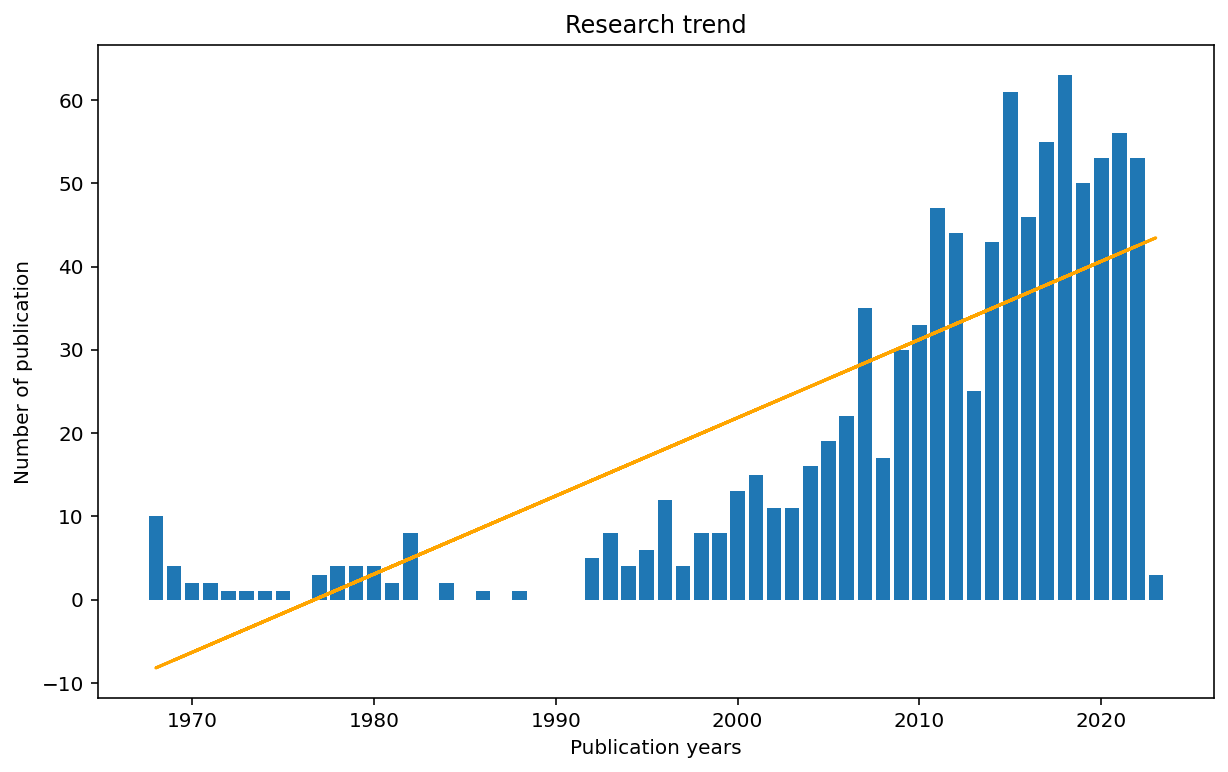

In [ ]:
from sklearn.linear_model import Ridge

lr = Ridge()
lr.fit(year_count_dropna[['Publication Year']], year_count_dropna['count'])

# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#    normalize=False, random_state=None, solver='auto', tol=0.001)

plt.bar(year_count_dropna['Publication Year'], year_count_dropna['count'])

plt.plot(year_count_dropna['Publication Year'], lr.coef_*year_count_dropna['Publication Year']+lr.intercept_, color='orange')

## Build bar plot graph
plt.title("Research trend")
plt.xlabel("Publication years")
plt.ylabel("Number of publication")

# Save files in pdf and eps format
# plt.savefig("../paper/figures/Fig.1 Research trend in Africa.jpeg", dpi=300)
# plt.savefig("../paper/figures/Fig.1 Research trend in Africa.png", dpi=300)

In [ ]:
data_concat_year = data_concat.drop(['PubMed_ID_wos','doi','source_title'], axis=1).set_index('wos_ID')

data_concat_year

KeyError: "['PubMed_ID_wos', 'doi', 'source_title'] not found in axis"

In [ ]:
data_concat_year_table = data_concat.groupby(['Publication Year']).count()
#save data
#year_count.to_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/year_count_countries.csv')

data_concat_year_table

In [ ]:
data_concat_year_group_table = data_concat.groupby(['year_group']).count()

#save data
#year_count.to_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/year_group_count_countries.csv')

data_concat_year_group_table

# Types de documents

Ici il faudrait définir et comparer l'évolution de la proportion des types de documents par région :
- par année et par pays
- ou par région
- ou global

In [ ]:
# document contries

In [ ]:
data_prep_all_doc_types = data_prep_all[['UT (Unique WOS ID)','Document Type']].rename(columns={'UT (Unique WOS ID)':'wos_ID'})
data_prep_all_doc_types['wos_ID'] = data_prep_all_doc_types['wos_ID'].str.lower()

In [ ]:
data_concat_doc_types = data_concat.merge(data_prep_all_doc_types, on = 'wos_ID', how='left')
data_concat_doc_types

In [ ]:
data_concat_doc_types_table = data_concat_doc_types.groupby(['Document Type']).count()

#save data
#data_concat_doc_types_table.to_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/doc_types_table_count_countries.csv')

data_concat_doc_types_table

In [ ]:
# document contries

In [ ]:
data_concat_doc_types2 = data_concat_doc_types[['year','year_group','Document Type']].set_index(['year_group','year'])
data_concat_doc_types2

In [ ]:
# get dummies to have data on columns
dfs = pd.get_dummies(data_concat_doc_types2['Document Type']).reset_index()
#save data
#dfs.to_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/doc_types_table_count_years.csv')

dfs

In [ ]:
data_concat_doc_types_year_table = dfs.groupby(['year']).count()
#save data
#data_concat_doc_types_year_table.to_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/doc_types_table_count_years.csv')

data_concat_doc_types_year_table

In [ ]:
data_concat_doc_types_year_g_table = dfs.groupby(['year_group']).count()
#save data
#data_concat_doc_types_year_g_table.to_csv('D:\RESEARCH IN AFRICA\Manuscripts/research strend in Africa wos/data/doc_types_table_count_years_group.csv')

data_concat_doc_types_year_g_table

# Publisher, Journal and  caracteristics


Quels sont les caractéristiques des journaux dans lesquels les pays publient et comment ça évoluent?:
- impact factor
- local, régional, continental ou autre,
- open Access journal ou non
- publisher and cities
- APC free, or not, solution for African countries or not

# Langues

Proposition and evolution of publications language according to countries, région, Global

# Funding

Proposition and evolution of publications receiving funding according to région, countries and global
Top 5 per région

# Thématiques

Wich thème are most publish on, according to countries, région and global,
And how they evolution

# Citations

Which region or countries are more attractive and received more Impact


# Collaboration scientifique

Proportion of local, regional, continental and international collaboration and evolution during years



# Nombre des auteurs
Évolution of authors numbers per studies, according to region

# Auteurs Africain en premier et dernier position et auteurs correspondant
Évolution of the proportion of African authors at the leading position according to the region:
- first
- last
- correspondant